# News Mood
GWU Data Analytics Boot Camp Homework 7

### Observable Trends

* Many of the tweets have a compound sentiment score of 0.
* Individual tweets run the gamut from very positive (+1 compound score) to very negative (-1 compound score).
* BBC Breaking News has significantly the lowest average compound score of any of the tested news outlets despite having some of the highest individual compound scores.

In [1]:
# Load Dependencies

import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Import and Initialize Sentiment Analyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Import Twitter API Keys

from twitter_config import (consumer_key,
                    consumer_key_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

### Data Collection

In [2]:
# Create list of target account handles

target_users = ["BBCBreaking", "CBSNews", "CNN", "FoxNews", "nytimes"]

# Create holding lists to combine target accounts' results

compound_list_results = []
positive_list_results = []
negative_list_results = []
neutral_list_results = []
tweets_ago_results = []
tweet_text_results = []
date_results = []

for user in target_users:

# Create holding places for each account's twitter and sentiment data
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    tweet_text_list = []
    date = []

# Initiate tweet counter
    
    i = 0

# Get most recent 100 tweets
    
    public_tweets = api.user_timeline(user, count=100, result_type="recent")
    
# Collect tweet information
    
    for tweet in public_tweets:
        tweet_text = tweet['text']
        tweet_date = tweet['created_at']
        results = analyzer.polarity_scores(tweet_text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
# Add tweet data to list
        
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
        tweet_text_list.append(tweet_text)
        tweets_ago.append(i)
        date.append(tweet_date)
        
# Adjust counter
        
        i += 1

# Add individual account lists to combined lists
        
    compound_list_results.append(compound_list)
    positive_list_results.append(positive_list)
    negative_list_results.append(negative_list)
    neutral_list_results.append(neutral_list)
    tweets_ago_results.append(tweets_ago)
    tweet_text_results.append(tweet_text_list)
    date_results.append(date)

### Dataframe Creation

In [3]:
# Create individual dataframes for each news outlet

bbc_df = pd.DataFrame({"Tweet Text":tweet_text_results[0], "Tweet Date":date_results[0], "Tweets Ago":tweets_ago_results[0], "Compound":compound_list_results[0], "Positive":positive_list_results[0], "Negative":negative_list_results[0], "Neutral":neutral_list_results[0]})
bbc_df["Network"] = "BBCBreaking"

cbs_df = pd.DataFrame({"Tweet Text":tweet_text_results[1], "Tweet Date":date_results[1], "Tweets Ago":tweets_ago_results[1], "Compound":compound_list_results[1], "Positive":positive_list_results[1], "Negative":negative_list_results[1], "Neutral":neutral_list_results[1]})
cbs_df["Network"] = "CBSNews"

cnn_df = pd.DataFrame({"Tweet Text":tweet_text_results[2], "Tweet Date":date_results[2], "Tweets Ago":tweets_ago_results[2], "Compound":compound_list_results[2], "Positive":positive_list_results[2], "Negative":negative_list_results[2], "Neutral":neutral_list_results[2]})
cnn_df["Network"] = "CNN"

fox_df = pd.DataFrame({"Tweet Text":tweet_text_results[3], "Tweet Date":date_results[3], "Tweets Ago":tweets_ago_results[3], "Compound":compound_list_results[3], "Positive":positive_list_results[3], "Negative":negative_list_results[3], "Neutral":neutral_list_results[3]})
fox_df["Network"] = "FoxNews"

nyt_df = pd.DataFrame({"Tweet Text":tweet_text_results[4], "Tweet Date":date_results[4], "Tweets Ago":tweets_ago_results[4], "Compound":compound_list_results[4], "Positive":positive_list_results[4], "Negative":negative_list_results[4], "Neutral":neutral_list_results[4]})
nyt_df["Network"] = "nytimes"

# Combine dataframes

df = pd.concat([bbc_df, cbs_df, cnn_df, fox_df, nyt_df], axis=0)

# Reformat combined dataframe

full_df = df.reset_index()
full_df = full_df[['Network', 'Tweets Ago', 'Tweet Date', 'Tweet Text', 'Compound', 'Negative', 'Neutral', 'Positive']]

# Save combined dataframe to CSV

full_df.to_csv("tweets_dataframe.csv")

# Print first 5 rows of combined dataframe

full_df.head()

,Network,Tweets Ago,Tweet Date,Tweet Text,Compound,Negative,Neutral,Positive
0,BBCBreaking,0,Sun Apr 08 13:34:07 +0000 2018,"Trump lashes out at Russia, Iran and Assad ove...",-0.7003,0.328,0.672,0.000
1,BBCBreaking,1,Sat Apr 07 23:06:07 +0000 2018,One person is reported to be seriously injured...,-0.7003,0.298,0.702,0.000
2,BBCBreaking,2,Sat Apr 07 21:59:55 +0000 2018,Brazil's ex-President Luis Inácio Lula da Silv...,0.0772,0.000,0.933,0.067
3,BBCBreaking,3,Sat Apr 07 19:26:41 +0000 2018,Two people were killed after a van drove into ...,-0.6705,0.191,0.809,0.000
4,BBCBreaking,4,Sat Apr 07 17:06:07 +0000 2018,"""There are some eyewitness accounts of other c...",0.0000,0.000,1.000,0.000


### Sentiment Scatter

/Users/annariehle/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


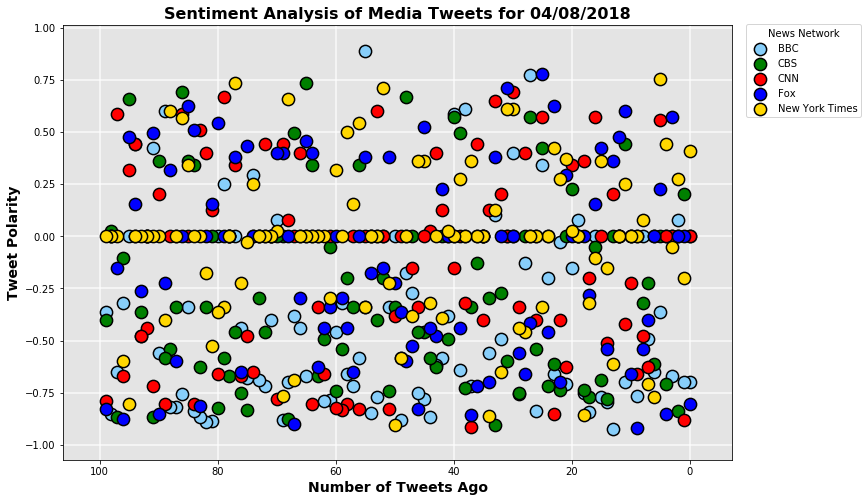

In [4]:
# Get today's date

today = datetime.date.today()

# Create scatterplot points for each twitter account

plt.scatter(bbc_df['Tweets Ago'], bbc_df['Compound'], color='lightskyblue', s=150, linewidth=1.5, edgecolor='black', label="BBC")
plt.scatter(cbs_df['Tweets Ago'], cbs_df['Compound'], color='g', s=150, linewidth=1.5, edgecolor='black', label="CBS")
plt.scatter(cnn_df['Tweets Ago'], cnn_df['Compound'], color='r', s=150, linewidth=1.5, edgecolor='black', label="CNN")
plt.scatter(fox_df['Tweets Ago'], fox_df['Compound'], color='b', s=150, linewidth=1.5, edgecolor='black', label="Fox")
plt.scatter(nyt_df['Tweets Ago'], nyt_df['Compound'], color='gold', s=150, linewidth=1.5, edgecolor='black', label="New York Times")

# Turn around the x-axis so it runs in descending order

plt.gca().invert_xaxis()

# Add plot labels and title

plt.ylabel("Tweet Polarity", fontsize=14, fontweight='bold')
plt.xlabel("Number of Tweets Ago", fontsize=14, fontweight='bold')
plt.title(f"Sentiment Analysis of Media Tweets for {today.strftime('%m/%d/%Y')}", fontsize=16, fontweight='bold')

# Format plot size, background, and grid

ax = plt.subplot()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height * 2])
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=2, color='white', alpha=0.6)
ax.set_axisbelow(True)

# Put a legend to the right of the current axis
ax.legend(bbox_to_anchor=(1.2, 1.013), title='News Network')

# Save plot as PNG

plt.savefig("sentiment_scatter.png")

### Average Sentiment Bar Chart

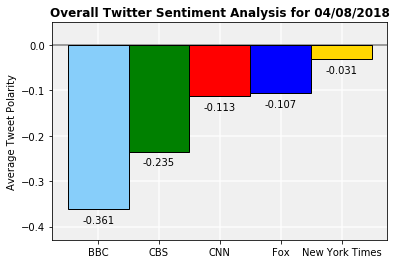

In [5]:
# Create x-axis values and labels

outlets = ['BBC', 'CBS', 'CNN', 'Fox', 'New York Times']
x_axis = np.arange(len(outlets))
xlabels = outlets

# Create a holder for average compound scores

means = []

# Calculate average compound score for each news outlet and add to means list

means.append(bbc_df['Compound'].mean())
means.append(cbs_df['Compound'].mean())
means.append(cnn_df['Compound'].mean())
means.append(fox_df['Compound'].mean())
means.append(nyt_df['Compound'].mean())

# Create bar chart with colors

fig, ax = plt.subplots()
news_plot = ax.bar(x_axis, means, color=['lightskyblue', 'g', 'r', 'b', 'gold'], edgecolor='black', width=1.0)

# Set x-axis values and labels

ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels)

# Create horizontal bar at y=0

plt.axhline(y=0, color="black", linestyle='-', alpha=0.5)

# Create and set data labels

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        if height > 0:
            label_position = height + 0.01
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                f"+{round(height, 3)}", ha='center', va='bottom', color="black")
        elif height < 0:
            label_position = height - 0.035
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(round(height, 3)), ha='center', va='bottom', color="black")
    ax.set_ylim((y_bottom - 0.05), (y_top + 0.05))
        
autolabel(news_plot, ax)
        
# Format plot area and grid
        
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.33)
plt.grid(linewidth=2, color='white', alpha=0.6)
ax.set_axisbelow(True)

# Add labels and title to plot

plt.ylabel("Average Tweet Polarity", fontsize=10)
plt.title(f"Overall Twitter Sentiment Analysis for {today.strftime('%m/%d/%Y')}", fontweight='bold')

# Save plot as PNG

plt.savefig("sentiment_bar.png")